In [1]:
library(jsonlite)

In [2]:
setwd("C:/Users/Johannes/Projects/results/output/20161218")
jsonData <- fromJSON("20161218-logstash.json", flatten = TRUE)

In [3]:
print(head(jsonData))

               _index _type                  _id _score         sort
1 logstash-2016.12.18  logs AVkR139EbpknfgCFxFy4     NA 1.482063e+12
2 logstash-2016.12.18  logs AVkR139NbpknfgCFxFy5     NA 1.482063e+12
3 logstash-2016.12.18  logs AVkR13WMbpknfgCFxFyH     NA 1.482063e+12
4 logstash-2016.12.18  logs AVkR13WMbpknfgCFxFyG     NA 1.482063e+12
5 logstash-2016.12.18  logs AVkR13WMbpknfgCFxFyE     NA 1.482063e+12
6 logstash-2016.12.18  logs AVkR13WMbpknfgCFxFyF     NA 1.482063e+12
  _source.source_host _source.level                _source.created
1       40.68.164.185             6 2016-12-18T12:10:35.454949019Z
2       40.68.164.185             6 2016-12-18T12:10:35.058709599Z
3       40.68.164.185             6 2016-12-18T12:10:35.528087556Z
4       40.68.164.185             6 2016-12-18T12:10:35.528087556Z
5       40.68.164.185             3 2016-12-18T12:10:35.058709599Z
6       40.68.164.185             6 2016-12-18T12:10:35.528087556Z
                                                

In [5]:
colnames(jsonData)

[1] "_index"                 "_type"                  "_id"                   
 [4] "_score"                 "sort"                   "_source.source_host"   
 [7] "_source.level"          "_source.created"        "_source.message"       
[10] "_source.version"        "_source.command"        "_source.tags"          
[13] "_source.image_name"     "_source.@timestamp"     "_source.container_name"
[16] "_source.host"           "_source.@version"       "_source.tag"           
[19] "_source.image_id"       "_source.container_id"   "_source.short_message" 
[22] "fields.created"         "fields.@timestamp"

In [9]:
head(jsonData[,c("_source.created","_source.message")])

_source.created,_source.message
2016-12-18T12:10:35.454949019Z,worker:ready Worker started.
2016-12-18T12:10:35.058709599Z,worker:ready Worker started.
2016-12-18T12:10:35.528087556Z,NA
2016-12-18T12:10:35.528087556Z,> node app.js
2016-12-18T12:10:35.058709599Z,npm info lifecycle elastic-worker@1.0.0~start: elastic-worker@1.0.0
2016-12-18T12:10:35.528087556Z,> elastic-worker@1.0.0 start /usr/src/app


In [56]:
workerStart <- jsonData[grep("worker:start", jsonData$"_source.message", ignore.case=T),]
head(workerStart[,c("fields.@timestamp","_source.host","_source.message")])
cat("N:", nrow(workerStart))

,fields.@timestamp,_source.host,_source.message
4221,1.482062e+12,node-01,worker:start Executing task H:CC:S for workflow 08359320-c516-11e6-99c6-755b0ed3b6d2
4270,1.482062e+12,node-09,worker:start Executing task H:CC:S for workflow e1c24850-c515-11e6-99c6-755b0ed3b6d2
4359,1.482062e+12,node-01,worker:start Executing task G:CC:M for workflow 08359320-c516-11e6-99c6-755b0ed3b6d2
4414,1.482062e+12,node-05,worker:start Executing task G:CC:S for workflow 1911fb20-c516-11e6-99c6-755b0ed3b6d2
4419,1.482062e+12,node-10,worker:start Executing task H:CC:S for workflow cd2fb620-c515-11e6-99c6-755b0ed3b6d2
4423,1.482062e+12,node-05,worker:start Executing task F:CI:M for workflow 1911fb20-c516-11e6-99c6-755b0ed3b6d2


N: 436

In [64]:
workerDone <- jsonData[grep("worker:done", jsonData$"_source.message", ignore.case=T),]
head(workerDone[,c("fields.@timestamp","_source.host","_source.message")])
cat("N:", nrow(workerDone))

,fields.@timestamp,_source.host,_source.message
4178,1.482062e+12,node-01,worker:done Finished with task H:CC:S for workflow 08359320-c516-11e6-99c6-755b0ed3b6d2
4222,1.482062e+12,node-09,worker:done Finished with task H:CC:S for workflow e1c24850-c515-11e6-99c6-755b0ed3b6d2
4223,1.482062e+12,node-01,worker:done Finished with task G:CC:M for workflow 08359320-c516-11e6-99c6-755b0ed3b6d2
4271,1.482062e+12,node-09,worker:done Finished with task G:CC:M for workflow e1c24850-c515-11e6-99c6-755b0ed3b6d2
4360,1.482062e+12,node-09,worker:done Finished with task D:CC:M for workflow 08359320-c516-11e6-99c6-755b0ed3b6d2
4368,1.482062e+12,node-05,worker:done Finished with task G:CC:S for workflow 1911fb20-c516-11e6-99c6-755b0ed3b6d2


N: 436

In [59]:
workerStart$start <- 1

In [67]:
workerStart$time <- as.POSIXct(workerStart$"fields.@timestamp", origin="1970-01-01")

ERROR: Error in as.POSIXct.default(workerStart$"fields.@timestamp", origin = "1970-01-01"): do not know how to convert 'workerStart$"fields.@timestamp"' to class "POSIXct"


In [62]:
head(workerStart[,c("fields.@timestamp","start")])

,fields.@timestamp,start
4221,1.482062e+12,1
4270,1.482062e+12,1
4359,1.482062e+12,1
4414,1.482062e+12,1
4419,1.482062e+12,1
4423,1.482062e+12,1
4424,1.482062e+12,1
4428,1.482062e+12,1
4523,1.482062e+12,1
4527,1.482062e+12,1


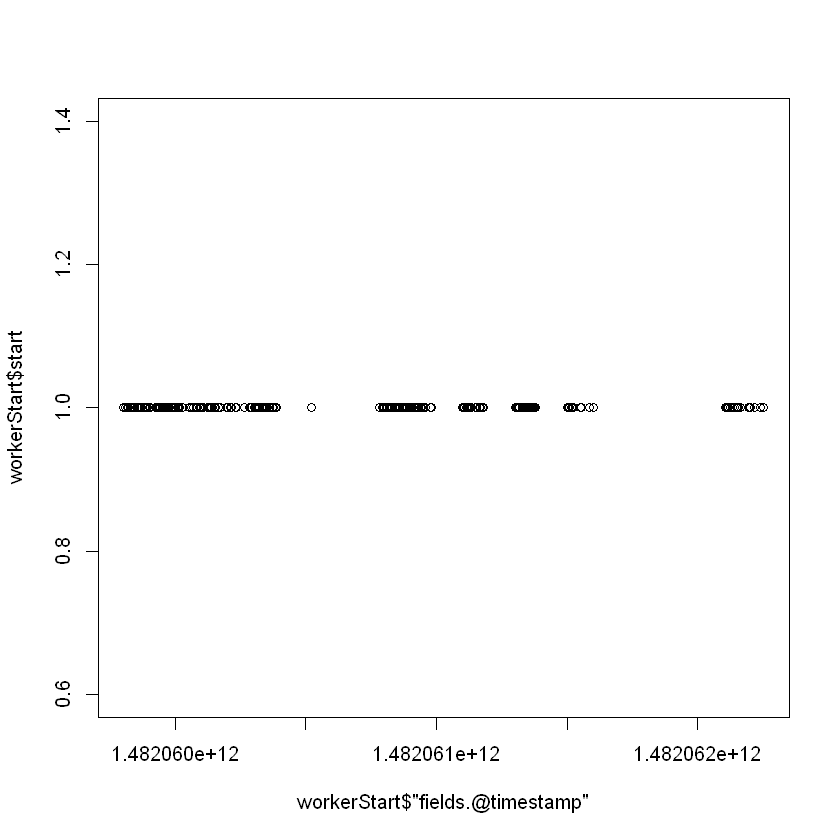

In [65]:
plot(workerStart$"fields.@timestamp", workerStart$start)

In [66]:
hist(workerStart$"fields.@timestamp")

ERROR: Error in hist.default(workerStart$"fields.@timestamp"): 'x' must be numeric
